**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

### Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| CRIM|	per capita crime rate by town|
| ZN|	proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS| proportion of non-retail business acres per town.	|
| CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)	|
| NOX|	nitric oxides concentration (parts per 10 million)|
| RM|	average number of rooms per dwelling|
| AGE|	proportion of owner-occupied units built prior to 1940 |
| DIS|	weighted distances to five Boston employment centres |
| RAD|	index of accessibility to radial highways |
| TAX |	full-value property-tax rate per 10,000  |
| PTRATIO |	 pupil-teacher ratio by town|
| LSTAT|  lower status of the population|
| MEDV | Median value of owner-occupied homes in 1000s|

In [1]:
!pip install scipy

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

Read in the csv file from the URL using the request library


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Display information about the dataset

1.  Structure of the dataframe
2.  Describe the dataset
3.  Number of rows and columns


print out the first five rows of the data


In [4]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


get information about each variable


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


get the number of rows and columns - prints as (number of rows, number of columns)


In [6]:
boston_df.shape

(506, 14)

### Task 4: Generate Descriptive Statistics and Visualizations

- For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Boxplot for MEDV')

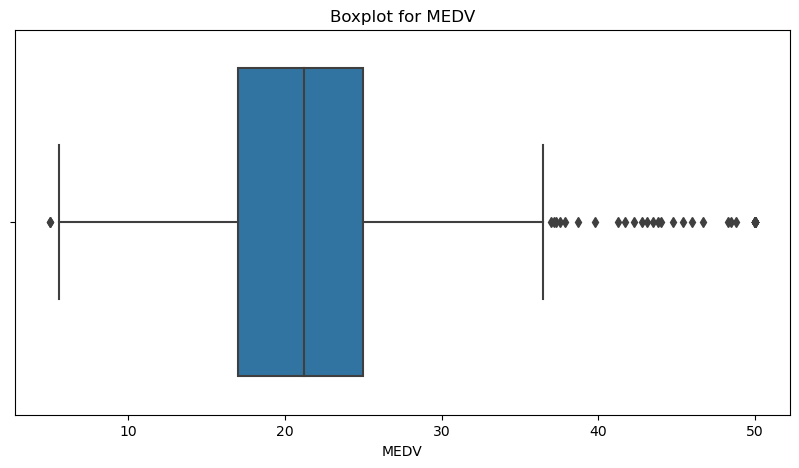

In [7]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=boston_df['MEDV'])
plt.title("Boxplot for MEDV")

- Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'bar plot for CHAS')

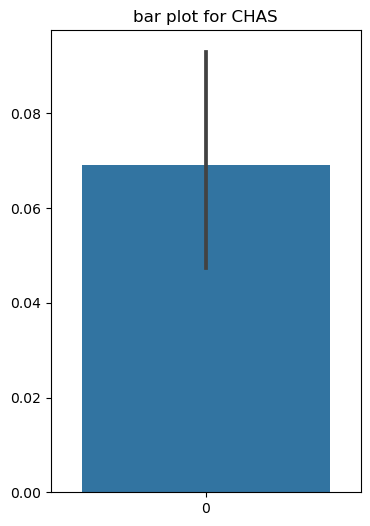

In [8]:
plt.figure(figsize=(4,6))
ax = sns.barplot(data=boston_df.CHAS)
plt.title("bar plot for CHAS")

- Provide a boxplot for the MEDV variable vs the AGE variable.

- 35 years and younger
- between 35 and 70 years
- and 70 years and older

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

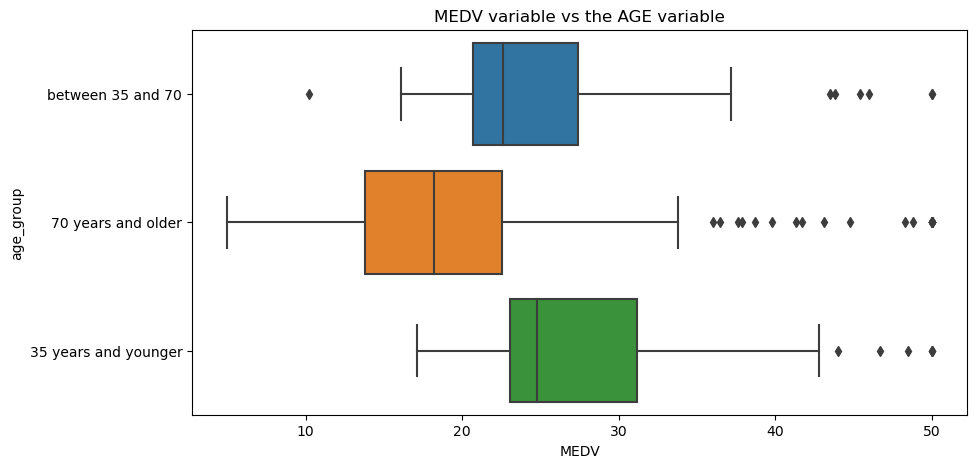

In [10]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=boston_df['MEDV'], y=boston_df['age_group'])
plt.title("MEDV variable vs the AGE variable")

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

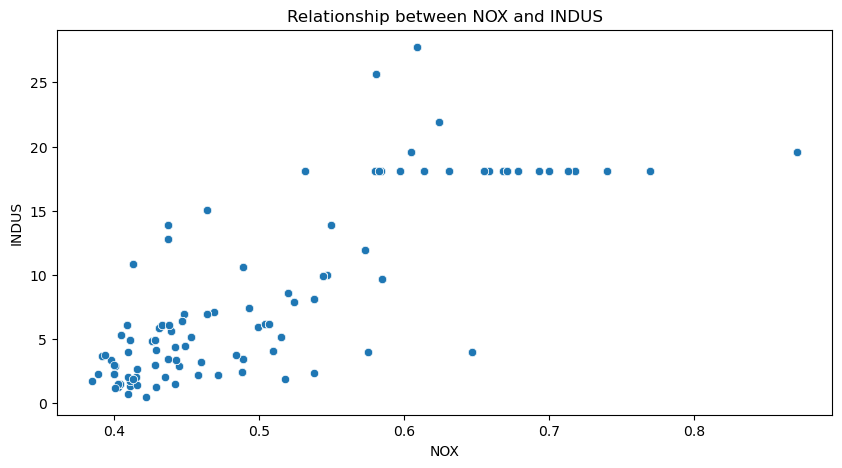

In [11]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title("Relationship between NOX and INDUS")

There seems to be a linear relationship till NOX=0.6

- Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

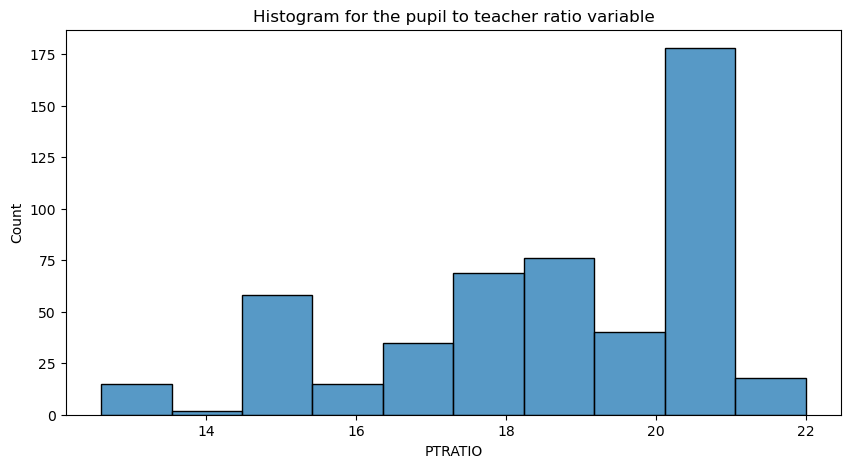

In [12]:
plt.figure(figsize=(10,5))
ax = sns.histplot(boston_df['PTRATIO'],bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")

Pupil to teacher ratio is highest at 20-21 range.

### Task 5: Use the appropriate tests to answer the questions provided.

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

boston_df

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in median value of houses bounded by the Charles river ")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference in median value of houses bounded by the Charles river ")


In [ ]:
boston_df["CHAS"].value_counts()

In [15]:
A = boston_df[boston_df['CHAS'] == 0] ['MEDV']
B = boston_df[boston_df['CHAS'] == 1] ['MEDV']

In [16]:
t_statistic, p_value = scipy.stats.ttest_ind(A,B,axis=0,equal_var=True)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is no significant difference in median value of houses bounded by the Charles river.")
else:
    print("There is a significant difference in median value of houses bounded by the Charles river.")

T-statistic: -3.996437466090509
P-value: 7.390623170519902e-05
There is no significant difference in median value of houses bounded by the Charles river.


- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in median value of houses for each proportion of owner occupied units built prior to 1940 (AGE)
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940 (AGE)

In [20]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [25]:
low = boston_df[boston_df['age_group'] == '35 years and younger'] ['MEDV']
mid = boston_df[boston_df['age_group'] == 'between 35 and 70'] ['MEDV']
high = boston_df[boston_df['age_group'] == '70 years and older'] ['MEDV']

In [27]:
scipy.stats.levene(low, mid, high, center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [28]:
f_statistic, p_value = scipy.stats.f_oneway(low, mid, high)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is no significant difference in median value of houses for each proportion of owner occupied units built prior to 1940 (AGE)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations (NOX) is not correlated with proportion of non-retail business acres per town (INDUS)
*   $H\_1:$ Nitric oxide concentrations (NOX) is correlated with proportion of non-retail business acres per town (INDUS)


Text(0.5, 1.0, 'Relationship between NOX and INDUS')

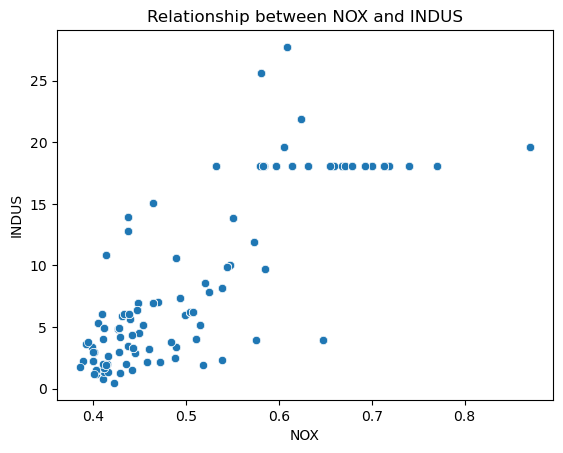

In [31]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.title("Relationship between NOX and INDUS")

In [34]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

Since the p-value < 0.05, We reject the null hypothesis and conclude that there exits a relationship between NOX and INDUS.

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [38]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        14:45:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Pearson Coeffiecent valuea
coef = np.sqrt(model.rsquared)
print("Pearson Coeffiecent valuea:", coef)

Pearson Coeffiecent valuea: 0.24992873408590346


The square root of R-squared is 0.25, which implies weak correlation between both features